# **Workshop 7: Outlier Detection**
**คำสั่ง**

1.   ศึกษาวิธีการเติมข้อมูลสูญหายเบื้องต้นต่อไปนี้
2.   ทำการเติมข้อมูลสูญหายทุกตัวแปรด้วยวิธีที่เหมาะสม 
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_06_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_07_650510714.ipynb ที่เว็บไซต์ https://mango-cmu.instructure.com/courses/6152/assignments/51681

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [2]:
# pd.read_csv("C:\\Users\\CSB307\\Desktop\\Lab_07\\weight-height.csv")
data = pd.read_csv("weight-height.csv")
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


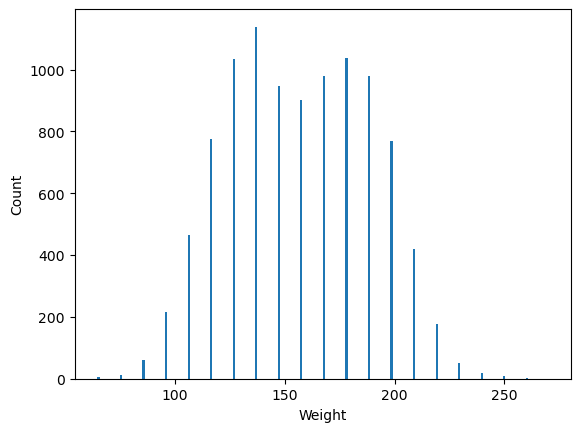

In [3]:
plt.hist(data.Weight, bins=20, width=1)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [4]:
data.Weight.describe() # อธิบาย Feature "Weight"

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

**Outlier Detection using Z-score**

ซึ่งมีสูตร คือ Z-score = (x - mean(X))/(std(X))

In [5]:
# detect extreme values of weight
threshold = 3

# calculate z-score of each data
data['zscore'] = (data.Weight - data.Weight.mean()) / data.Weight.std()

# find the data that the z-score is not in [-threshold, threshold]
data[(data['zscore']>threshold) | (data['zscore']< -1*threshold)] # หาว่ามีข้อมูลใดบ้างที่อยู่นอกขอบเขตของ threshold ที่กำหนดไว้

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711
9285,Female,54.263133,64.700127,-3.012922


ปฏิบัติการข้อ 1) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วยวิธี z-score เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [47]:
# Answer here!
#data['zscore'] = (data.Weight - data.Weight.mean()) / data.Weight.std()

# ค่าความสูงใดที่มีค่า zscore มากกว่าหรือน้อยกว่า threshold จะนับว่าเป็นข้อมูลผิดปรกติ
threshold = 3

# คำนวณค่า Z-score ของ Feature Height
data["Height_Z-score"] = (data["Height"] - data["Height"].mean()) / data["Height"].std()

# ทำการตรวจสอบหาข้อมูลผิดปรกติโดยใช้ threshold ที่ได้กำหนดไว้
result = data[(data["Height_Z-score"] > threshold) | (data["Height_Z-score"] < -1*threshold)]
result

,Gender,Height,Weight,zscore,Height_Z-score
994,Male,78.095867,255.690835,2.935380,3.048271
1317,Male,78.462053,227.342565,2.052489,3.143445
2014,Male,78.998742,269.989699,3.380711,3.282934
3285,Male,78.528210,253.889004,2.879263,3.160640
3757,Male,78.621374,245.733783,2.625273,3.184854
6624,Female,54.616858,71.393749,-2.804453,-3.054091
9285,Female,54.263133,64.700127,-3.012922,-3.146027


**Outlier Detection using DBSCAN**

In [60]:
clusterInd = DBSCAN(eps = 5, min_samples = 5).fit_predict(data.loc[:,['Weight']])
np.unique(clusterInd)  # -1 is noise

# retrieve the data that its cluster is -1
data[clusterInd == -1]

,Gender,Height,Weight,zscore,Height_Z-score
2014,Male,78.998742,269.989699,3.380711,3.282934
5360,Female,55.668202,68.982530,-2.879549,-2.780839
6624,Female,54.616858,71.393749,-2.804453,-3.054091
9285,Female,54.263133,64.700127,-3.012922,-3.146027


ปฏิบัติการข้อ 2) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วยวิธี DBSCAN เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [83]:
# Answer here!
clusterInd = DBSCAN(eps = 0.4, min_samples = 5).fit_predict(data.loc[:,["Height"]])
np.unique(clusterInd) # -1 is noise

# retrieve the data that its cluster is -1
data[clusterInd == -1]

,Gender,Height,Weight,zscore,Height_Z-score
994,Male,78.095867,255.690835,2.935380,3.048271
1317,Male,78.462053,227.342565,2.052489,3.143445
2014,Male,78.998742,269.989699,3.380711,3.282934
3285,Male,78.528210,253.889004,2.879263,3.160640
3757,Male,78.621374,245.733783,2.625273,3.184854
6624,Female,54.616858,71.393749,-2.804453,-3.054091
7294,Female,54.873728,78.606670,-2.579810,-2.987329
7617,Female,55.148557,88.812412,-2.261958,-2.915899
9285,Female,54.263133,64.700127,-3.012922,-3.146027


**Outlier Detection using isolation forest**

In [30]:
# training the model
iforest = IsolationForest(n_estimators = 100).fit(data.loc[:,['Weight']])
scores = iforest.score_samples(data.loc[:,['Weight']])
print(np.min(scores),np.max(scores))

-0.7764342755948077 -0.4323978267604221


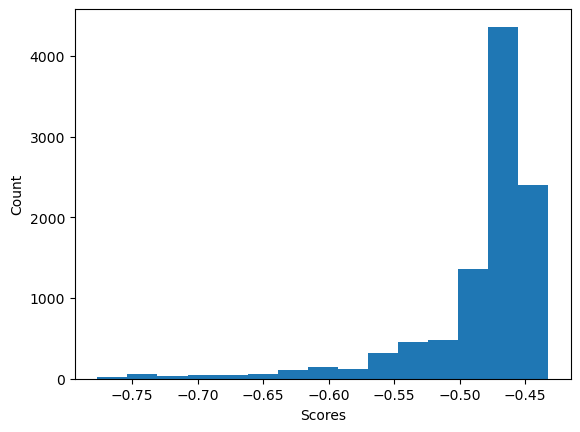

In [31]:
plt.hist(scores, bins=15)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

In [33]:
threshold = -0.75
# retrieve the data that its score is lower than threshold
data[scores < threshold]

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
994,Male,78.095867,255.690835,2.935380
1506,Male,75.698618,249.565628,2.744614
1610,Male,76.617546,255.863326,2.940752
1750,Male,74.604668,249.946283,2.756469
1896,Male,76.472880,246.232321,2.640800
1954,Male,76.116675,240.638103,2.466571
2014,Male,78.998742,269.989699,3.380711
2070,Male,77.465569,252.556689,2.837769
2074,Male,75.624031,241.202330,2.484144


In [32]:
threshold = -0.76
# retrieve the data that its score is lower than threshold
data[scores < threshold]

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
994,Male,78.095867,255.690835,2.935380
1506,Male,75.698618,249.565628,2.744614
1610,Male,76.617546,255.863326,2.940752
1750,Male,74.604668,249.946283,2.756469
1896,Male,76.472880,246.232321,2.640800
2014,Male,78.998742,269.989699,3.380711
2070,Male,77.465569,252.556689,2.837769
2971,Male,75.156879,250.317151,2.768020
3228,Male,76.268668,247.386741,2.676754


In [34]:
threshold = -0.77
# retrieve the data that its score is lower than threshold
data[scores < threshold]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,2.935380
1506,Male,75.698618,249.565628,2.744614
1610,Male,76.617546,255.863326,2.940752
1750,Male,74.604668,249.946283,2.756469
1896,Male,76.472880,246.232321,2.640800
2014,Male,78.998742,269.989699,3.380711
2070,Male,77.465569,252.556689,2.837769
2971,Male,75.156879,250.317151,2.768020
3228,Male,76.268668,247.386741,2.676754
3285,Male,78.528210,253.889004,2.879263


ปฏิบัติการข้อ 3) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วย isolation forest เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [84]:
# Answer here!
# Training the model
iforest = IsolationForest(n_estimators = 100).fit(data.loc[:,['Height']])
scores = iforest.score_samples(data.loc[:,['Height']])
print(np.min(scores),np.max(scores))

-0.7706771528566296 -0.4412833727110238


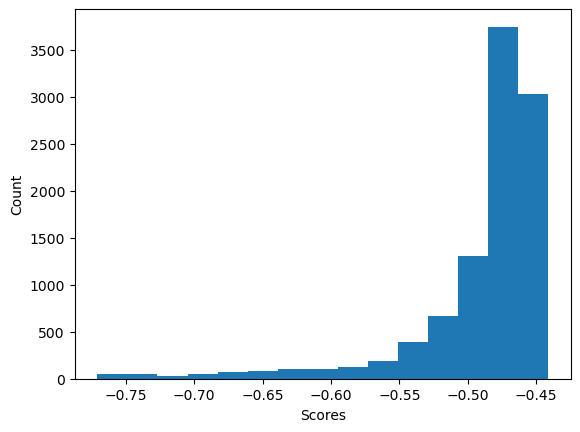

In [91]:
plt.hist(scores, bins=15)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

In [95]:
threshold = -0.77
# retrieve the data that its score is lower than threshold
data[scores < threshold]

,Gender,Height,Weight,zscore,Height_Z-score
994,Male,78.095867,255.690835,2.935380,3.048271
1317,Male,78.462053,227.342565,2.052489,3.143445
2014,Male,78.998742,269.989699,3.380711,3.282934
3285,Male,78.528210,253.889004,2.879263,3.160640
3757,Male,78.621374,245.733783,2.625273,3.184854
